In [14]:
import pandas as pd
paises = pd.read_csv("paises.csv")
paises.head()

,Percapitaincome,Literacy,Country
0,10326,90.0,Brazil
1,39650,99.0,Germany
2,830,38.7,Mozambique
3,43163,99.0,Australia
4,5300,90.9,China


In [15]:
X = paises.iloc[:, 0:2].values 
X

array([[1.0326e+04, 9.0000e+01],
       [3.9650e+04, 9.9000e+01],
       [8.3000e+02, 3.8700e+01],
       [4.3163e+04, 9.9000e+01],
       [5.3000e+03, 9.0900e+01],
       [1.3308e+04, 9.7200e+01],
       [3.4105e+04, 9.9000e+01],
       [1.0600e+04, 8.2400e+01],
       [1.0000e+03, 6.8000e+01],
       [5.2490e+03, 8.5000e+01]])

In [11]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters = 2, init = 'random')

In [17]:
kmeans.fit(X)

KMeans(init='random', n_clusters=2)

In [18]:
kmeans.cluster_centers_

array([[38972.66666667,    99.        ],
       [ 6659.        ,    78.88571429]])

In [19]:
distance = kmeans.fit_transform(X)
distance

array([[28646.66808044,  3667.01684307],
       [  677.33333333, 32991.00613174],
       [38142.71433098,  5829.13852054],
       [ 4190.33333333, 36504.00554165],
       [33672.6676409 ,  1359.05310531],
       [25664.66672979,  6649.02522277],
       [ 4867.66666667, 27446.00737055],
       [28372.67152275,  3941.00156689],
       [37972.6793205 ,  5659.01046993],
       [33723.66957264,  1410.01325685]])

In [20]:
labels = kmeans.labels_
labels

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

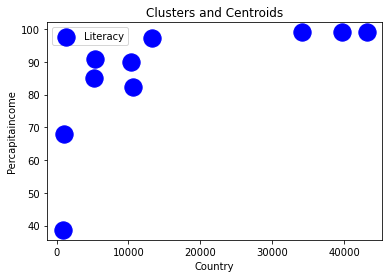

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue',label = 'Literacy')
plt.title('Clusters and Centroids')
plt.xlabel('Country')
plt.ylabel('Percapitaincome')
plt.legend()

plt.show()

In [39]:
import numpy as np
from numpy.linalg import norm

In [40]:
class Kmeans:
    '''Implantação do algoritmo K-means'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

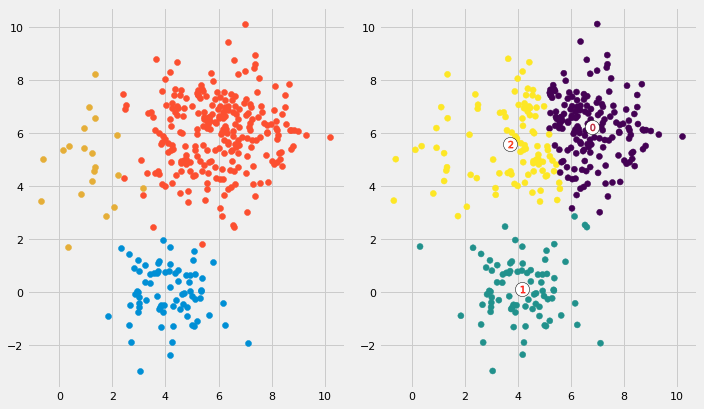

In [43]:
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

# Run kmeans
km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()
